In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.cumsum(np.array([0, 1, 0.8, 0.64, 0.512])*input_scaler)

array([ 0.  , 10.  , 18.  , 24.4 , 29.52])

Resource input has enabled you to hunt a maximum of 4 deer


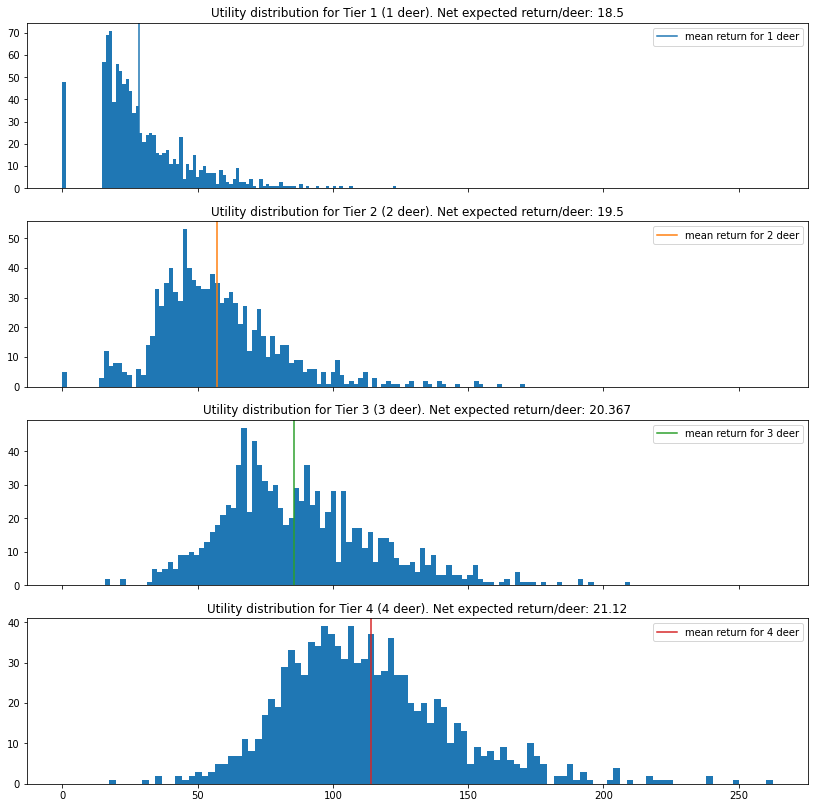

71.45849641492788


In [ ]:
p = 0.95
lam = 1

input_scaler = 10
output_scaler = 15

def deer_return(output_scaler=20):
  """
  deer_return() is effectively the combination of two other RVs:
  - D: Bernoulli RV that represents the probaility of catching a deer at all (binary). Usually p - i.e. P(D=1) = p - will be fairly 
  close to 1 (fairly high chance of catching a deer if you invest the resources)
  - W: A continuous RV that adds some variance to the return. This could be interpreted as the weight of the deer that is caught. W is
  exponentially distributed such that the prevalence of deer of certain size is inversely prop. to the size.

  :return H, where H = D*(1+W) is an other random variable
  """
  D = np.random.binomial(1, p, 1)[0]
  W = w_mult*np.random.exponential(scale=lam)
  return D*(1+W)*output_scaler

def utility_tier(x_in, max_per_hunt=4, decay=0.8, input_scaler=20):
  sum = 0
  for i in range(max_per_hunt):
    sum += input_scaler*(decay**i)
    if x_in < sum:
      return i
  return max_per_hunt

def min_cost_for_deer(n_deer, input_scaler=10):
  return np.cumsum(np.array([0, 1, 0.8, 0.64, 0.512])*input_scaler)[min(n_deer, 4)]

def deer_hunt(x_in, n_deer=None):
  n_deer = n_deer if n_deer is not None else utility_tier(x_in) # just for debugging for now
  total_return = np.sum([deer_return(output_scaler=output_scaler) for i in range(n_deer)])
  return total_return

n = 1000 # number of simulations
x_in = 100 # input resources (this may be multiplied by some constant)
n_deer = utility_tier(x_in)

u = [[deer_hunt(0, n_deer=d+1) for t in range(n)] for d in range(n_deer)] # utility vector

print(f"Resource input has enabled you to hunt a maximum of {n_deer} deer")

fig, axes = plt.subplots(4,1, figsize=(14,14), sharex=True)

for d in range(n_deer):
  mu = p*(1+1/lam)*output_scaler # calculated mean for one deer
  net_exp_return = mu*(d+1) - min_cost_for_deer(d+1, input_scaler=input_scaler)
  axes[d].set_title(f'Utility distribution for Tier {d+1} ({d+1} deer). Net expected return/deer: {round(net_exp_return/(d+1), 3)}')
  axes[d].axvline((d+1)*mu, color='C'+str(d), label=f'mean return for {d+1} deer')
  axes[d].hist(u[d], bins=100)
  axes[d].legend()

plt.show()
print(np.mean(u)) # this should equal n_deer*mu from above

No handles with labels found to put in legend.


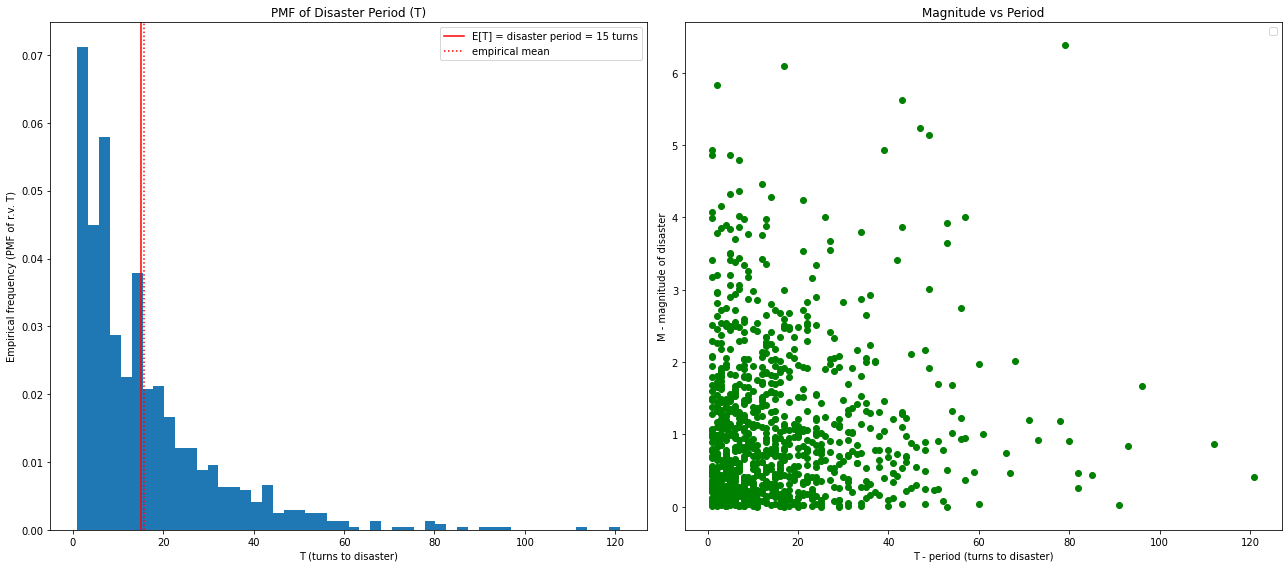

In [ ]:
x_range = [0, 10]
y_range = [0, 10]

disaster_period = 15 # expected/actual time between disasters
p = 1/disaster_period # controls frequency distr
lam = 1 # controls severity/magnitude distr

n_trials = 1000

def sample_disaster(p, lam, x_range=(0, 10), y_range=(0, 10)):
  get_epi = lambda coord_range: np.random.uniform(low=coord_range[0], high=coord_range[1])
  
  if np.random.binomial(1, p) == 1:
      epi_x = get_epi(x_range)
      epi_y = get_epi(y_range)
      mag = np.random.exponential(scale=lam)
      return mag, epi_x, epi_y
  return 0, -1, -1

# temporal pmf is a geometric distribution with prob. param p
disaster_freq_pmf = np.random.geometric(p, size=1000)
mag_pmf = np.random.exponential(scale=lam, size=1000)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(18,8))
ax0.hist(disaster_freq_pmf, bins=50, density=True)
ax0.axvline(1/p, label='E[T] = disaster period = 15 turns', color='r')
ax0.axvline(np.mean(disaster_freq_pmf), label='empirical mean', color='r', linestyle='dotted')
ax0.set_ylabel('Empirical frequency (PMF of r.v. T)')
ax0.set_xlabel('T (turns to disaster)')
ax0.set_title('PMF of Disaster Period (T)')
ax0.legend()

ax1.scatter(disaster_freq_pmf, mag_pmf, color='g')
ax1.set_title('Magnitude vs Period')
ax1.set_xlabel('T - period (turns to disaster)')
ax1.set_ylabel('M - magnitude of disaster')
ax1.legend()

# plt.tight_layout()
# plt.savefig('disaster_plots.png')

In [ ]:
gd_exp_10_scott = "0.42252452394889756 0.42111458047491557 0.4169309230822993 0.4101095706178867 0.40086907977377073 0.3894989876310162 0.3763448710790295 0.3617911103102773 0.346242558421221 0.3301063223256779 0.31377475912621877 0.2976106054136469 0.2819349112073492 0.2670181757716507 0.25307480935892 0.2402607990820798 0.22867425808267466 0.21835839650909492 0.20930637414316608 0.20146747437542506 0.19475406881474383 0.1890489088890846 0.18421237161494378 0.18008938769767885 0.17651587909181723 0.17332462016811861 0.17035050451845785 0.16743524397702583 0.16443154646329664 0.16120681647168617 0.15764640076033662 0.15365636844998443 0.14916577714549778 0.14412834311142295 0.13852341163906912 0.13235611952531998 0.1256566584250927 0.11847858591181373 0.11089618719280209 0.10300095838956222 0.09489735376673494 0.08669800499842858 0.07851867165772734 0.07047321152469407 0.06266886274900535 0.05520210648382784 0.0481553308835721 0.041594450869142104 0.03556756044739873 0.030104614220471025"
gd_exp_20_scott = "0.6995301687147611 0.6953721633858876 0.6830256712889373 0.6628816636590525 0.6356142971443646 0.6021974071841989 0.5638989269203503 0.5222366850558191 0.4788875581157116 0.4355544978223491 0.39380896680010063 0.35493590884516385 0.31981148948081006 0.28883917498643313 0.26195818729152515 0.2387228718148085 0.21843608929385785 0.20030841120864593 0.18361050991847744 0.16778959349703262 0.1525308249228082 0.1377584886991496 0.1235855379644495 0.11023064509693317 0.09792672051566698 0.08684345194662679 0.0770398102315091 0.06845294394350246 0.06092019939455354 0.054223601054457726 0.04814252858348043 0.04250083150243708 0.03719839865950982 0.03222267599858046 0.027641047445937015 0.023578952421078124 0.020190401009971756 0.01762724071917112 0.016011816860709 0.015415514986213259 0.015843938215092623 0.017228628070135865 0.019425264529171572 0.02221875259920014 0.025335915735580826 0.028466172194299012 0.03128939972318212 0.03350844415084603 0.034881979680511654 0.03525237745525592"
gd_exp_50_scott = "0.8520267704903141 0.8441892264151372 0.8209789620017028 0.7833363501924967 0.7329168698359848 0.6721530495069054 0.6042298728389865 0.5329193852888426 0.46226141363071 0.39612825851748834 0.33775428579920297 0.2893318084906128 0.2517656671180389 0.2246433948026336 0.2064269305403609 0.19482067549444348 0.1872332595115437 0.18123530933841497 0.17492426035960937 0.16713511221709104 0.15747468113989702 0.1461970675427515 0.1339711474939181 0.12160992659653411 0.10983225541453993 0.09910962130172614 0.08961979251683706 0.08129489170495154 0.07392531981593993 0.06727111531626467 0.06114067118393192 0.055418093890658514 0.050045148660467643 0.04498155946709712 0.040171967952277274 0.03553878583537027 0.031003195548497703 0.02652058496135325 0.02210950982754871 0.017857613048005695 0.01390037438283873 0.010381835471806647 0.007413740917925278 0.005048169395001482 0.003270915777412498 0.0020136182362277526 0.0011764270247651358 0.0006517355938606496 0.0003421620161049228 0.000170158050229715"
gd_exp_100_scott = "0.669329801780184 0.6674619105548527 0.6614401105048362 0.6501769242090469 0.6323401909419615 0.6068576125888284 0.5733300558310881 0.5322693495719392 0.4851620057661009 0.4343870577096647 0.38299423175483793 0.33433237978684344 0.2915470044773686 0.2570298107885227 0.2319580419581015 0.21606697024955346 0.20774500356000597 0.20444609283740534 0.2033125754948004 0.20182955876477296 0.19831718732776538 0.19211959844433538 0.18345570188961574 0.17302164001987308 0.1615289075872001 0.14938022049817296 0.13660951838904922 0.12307258612108214 0.10874321178689467 0.0939234046021841 0.07924347361610383 0.06546386665059077 0.053206276720003956 0.04276660641977038 0.034093592658151324 0.02691191096321062 0.020897423836044527 0.015808836964961992 0.01152900396785135 0.008028414916775197 0.005297472450024558 0.0032929259950137692 0.0019201255158827143 0.001047105407966989 0.0005328617704551973 0.00025264586870725155 0.00011147422370394995 4.573194866614817e-05 1.7432401800630275e-05 6.1710993001276535e-06"
gd_exp_100_scott = "0.8011440352001831 0.7896662923200721 0.7576156411480564 0.7118686197241327 0.6619291873274797 0.6158284697332339 0.5761284012469988 0.5393511165604005 0.499847232113499 0.45514289871554886 0.4076146624662913 0.3611266521392853 0.3175264728943453 0.27736071052941946 0.24249691830897904 0.21581762835625667 0.1979692096743655 0.18568328172328824 0.17414972516226854 0.1606380984796355 0.14547066832278469 0.1301918449266687 0.1155964505751554 0.10147532393073254 0.08768948790130464 0.07491733742885379 0.064166200698148 0.05592736734640724 0.05016124261434338 0.046799216296213024 0.045675291067236556 0.04584375503497858 0.045397812740782584 0.04255253505556249 0.03713385141733089 0.030745405220911813 0.025317146930016923 0.021699486586577898 0.01967412514498383 0.01883655006537062 0.018975062846042647 0.01963171134103636 0.019828625958129995 0.01868030927891118 0.01622375763443337 0.013404568847522644 0.011295987903052833 0.010487124582585567 0.011022194940081808 0.012463335135366044"

In [ ]:
go_data_100 = "1.9184839591199542e-11 3.5148720876713715e-09 4.915583700261552e-07 2.6773754069307646e-05 0.0005886853970581072 0.005598791461353615 0.026222039536417583 0.07250724727694387 0.1351559092000861 0.1797068684994084 0.1888492835394483 0.17634439670715582 0.12743609237969225 0.06040990567769815 0.020898468154442535 0.005432326220301511 0.0007743783544681315 4.720532988408022e-05 1.12301239401076e-06 1.0119733267489264e-08 3.414775111742874e-11"
go_data_10 = "2.0004549163656804e-13 9.068491666398253e-11 3.027933806358043e-08 3.731364151252567e-06 0.0001708153129441301 0.0029623368929297083 0.02058817489464501 0.0659612586182328 0.12668509125795158 0.19692125354758339 0.2537805444663431 0.21308320288280416 0.09716841176406062 0.020764292725106125 0.0018460958789076737 6.391984851264905e-05 8.366488940013366e-07 4.086293070923508e-09 7.401873019733266e-12 4.956755433296947e-15 1.2249251094296894e-18"
go_data_20 ="2.875553782167767e-12 8.31486809848686e-10 1.7899841884111627e-07 1.4440528356769608e-05 0.0004418123921200499 0.005266886339306021 0.02638829669850242 0.0673445542022679 0.11543280847784843 0.15969650711188532 0.20084217335710708 0.20687700682188778 0.1325198894979417 0.05269053870140419 0.022990626098591243 0.00816812266643258 0.001252610800167335 7.200717714793216e-05 1.525924558143086e-06 1.189854778932991e-08 3.413274972057166e-11"
go_data_50 = "1.9311250138373996e-12 5.72803372437345e-10 1.2698438273874392e-07 1.0634151697432737e-05 0.0003435172016693357 0.0044743335403436 0.025841869706903716 0.07810633780790241 0.1464820300506838 0.18908399802638662 0.1914404730280173 0.17074520081132974 0.11564866638651089 0.05256537244527297 0.019397786810394967 0.00516022970750118 0.0006642616437954465 3.447062180185137e-05 6.85048224989998e-07 5.125134725706121e-09 1.4314222109606197e-11"

gd_exp_100 = "0.5171584975408663 0.5157007755229868 0.5113603829823732 0.5042342804945039 0.4944796150584847 0.48230731080153555 0.4679736190804027 0.45177010573986265 0.4340126292565104 0.41502990109246973 0.39515221729051103 0.37470090981229986 0.3539789919511961 0.3332633713924582 0.3127988859604241 0.2927942905267835 0.2734201987430897 0.2548088691853047 0.23705562960298282 0.2202216606139885 0.2043378143474745 0.1894091247293376 0.17541967256894636 0.16233749670131625 0.1501192871733042 0.13871465210956557 0.12806981061407172 0.11813062446048422 0.10884493688997215 0.100164234233458 0.0920446832712593 0.08444762346756239 0.07733960880455867 0.07069210007529766 0.06448090690861258 0.058685471474657726 0.0532880747181971 0.04827303283000276 0.043625937888032304 0.03933298317619399 0.0353804012376209 0.03175403154813194 0.02843902489319015 0.02541968306891809 0.022679425342327166 0.020200867161824176 0.01796599192401099 0.01595639324517506 0.014153563247697109 0.012539201927957124"
gd_exp_50 = "0.5252375882658946 0.5236084989009021 0.5187603405688984 0.5108087971984727 0.4999412858351256 0.4864091981787755 0.4705176663346655 0.45261342647674185 0.4330714461376798 0.4122810273271875 0.39063209685378597 0.36850234902234824 0.3462458196646482 0.32418335243078267 0.30259527863389657 0.28171648195383425 0.2617338702624502 0.24278613912129893 0.22496559379640407 0.20832170530826544 0.19286601482603186 0.17857797066014786 0.16541128173236144 0.15330039711733617 0.14216676790626276 0.13192460916074647 0.12248594973789842 0.11376483020388528 0.10568057861197346 0.09816015640091352 0.09113961914049544 0.08456477767438872 0.07839117392744493 0.07258350277098533 0.0671146181034119 0.06196425936985669 0.05711762596124558 0.052563913124092046 0.048294905834670505 0.0443037079585685 0.04058366408169197 0.03712751158031702 0.033926781532266526 0.030971449570209905 0.02824982227363948 0.02574863166462156 0.023453300231507036 0.021348331986571732 0.019417781573118312 0.017645753408003506"
gd_exp_20 = "0.4894195423273279 0.48803382012492275 0.4839108299920262 0.4771514920411294 0.4679187536871662 0.45643009102713233 0.44294773676686605 0.4277672826785509 0.41120538767178133 0.3935873443363738 0.3752352182059679 0.35645718179502084 0.3375385313279312 0.31873471300513856 0.30026651418463673 0.2823174092391179 0.2650329043223748 0.24852161075402496 0.23285769993546546 0.2180843558773934 0.20421784251769862 0.19125183641591673 0.17916173292358376 0.1679087059535204 0.15744337823094337 0.14770903154745266 0.1386443479796941 0.13018571854744546 0.12226918321609849 0.11483207582523802 0.10781444189509375 0.10116028032122473 0.09481863657370844 0.08874455018417089 0.08289983755333544 0.07725367595458636 0.07178294820820695 0.06647231053423545 0.061313957814301344 0.05630707897171013 0.05145701765716524 0.04677417675702535 0.04227272632766659 0.03796919075974035 0.03388100040048108 0.030025094555334978 0.0264166567752393 0.023068050531207016 0.019988005408913035 0.01718108289774711"
gd_exp_10 = "0.4053361328930324 0.4041900966190083 0.4007847839050065 0.3952170389905715 0.38764322290365427 0.3782719888024697 0.36735482557951393 0.3551749597113827 0.3420352849096623 0.32824601537143056 0.31411273220800384 0.29992541976882214 0.2859489788911812 0.27241557005439265 0.2595189945529668 0.24741117925317516 0.2362007016428866 0.2259531853958442 0.2166933179594154 0.20840819277467226 0.20105165857682433 0.1945493631859472 0.18880420387431074 0.183701934416685 0.17911672376794766 0.17491650699382108 0.17096801073495854 0.1671413697115999 0.16331427581683844 0.15937561706493805 0.15522857135324344 0.15079312205865686 0.14600796198528102 0.14083175234890066 0.13524370725464332 0.1292434836785206 0.1228503734118838 0.11610181663280361 0.10905128534397845 0.10176561640358178 0.0943219050698221 0.08680409737164697 0.07929943987422265 0.07189495583466872 0.06467411565863274 0.05771385653253585 0.05108208198480602 0.044835738977533096 0.03901953092695213 0.03366528332470558"

distType = "exp"

if distType == "normal":
  data = {10: go_data_10, 20: go_data_20, 50: go_data_50, 100: go_data_100}
  y_emp = np.random.normal(loc=10, scale=2, size=1000)
  x = np.arange(0, 20)
elif distType == "exp":
  data = {10: gd_exp_10, 20: gd_exp_20, 50: gd_exp_50, 100: gd_exp_100}
  data_bw_opt = {10: gd_exp_10_scott, 20: gd_exp_20_scott, 50: gd_exp_50_scott, 100: gd_exp_100_scott}
  y_emp = np.random.exponential(scale=1, size=1000)
  x = np.arange(0, 5, step=0.1)


9.855121990983786

In [ ]:
(x-mu)/s = 1 .. s+mu

1.0063728131058602 7.511770562944639
0.4129169558489849 3.2825356122569396
2.01849384482087 13.81601691618031
0.577486506531776 3.9300335506182265
2.9890267954638756 19.558644455038205
0.7857876185904047 6.949186904746253
4.042162524767039 25.612390505310596
1.032593870649223 7.586806634831175


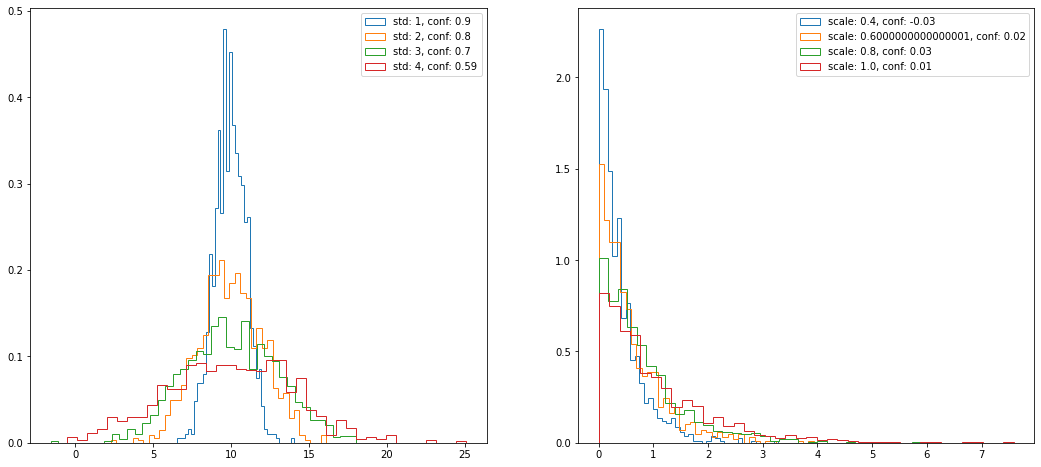

In [ ]:
def conf(y):
  mu = np.mean(y)
  print(np.std(y), np.max(y)-np.min(y))
  return 1-np.std(y)/np.mean(y)#(np.quantile(y, 0.95) - np.quantile(y, 0.05))

# def conf2(y):


fig, (ax0, ax1) = plt.subplots(1,2, figsize=(18,8))
for i in range(1, 5):
  y_norm = np.random.normal(loc=10, scale=i, size=1000)

  exp_scale = 0.2+0.2*i
  y_exp = np.random.exponential(scale=exp_scale, size=1000)
  ax0.hist(y_norm, label=f"std: {i}, conf: {conf(y_norm).round(2)}", density=True, histtype='step', bins=40)
  ax1.hist(y_exp, label=f"scale: {exp_scale}, conf: {conf(y_exp).round(2)}", density=True, histtype='step', bins=40)

ax0.legend()
ax1.legend()

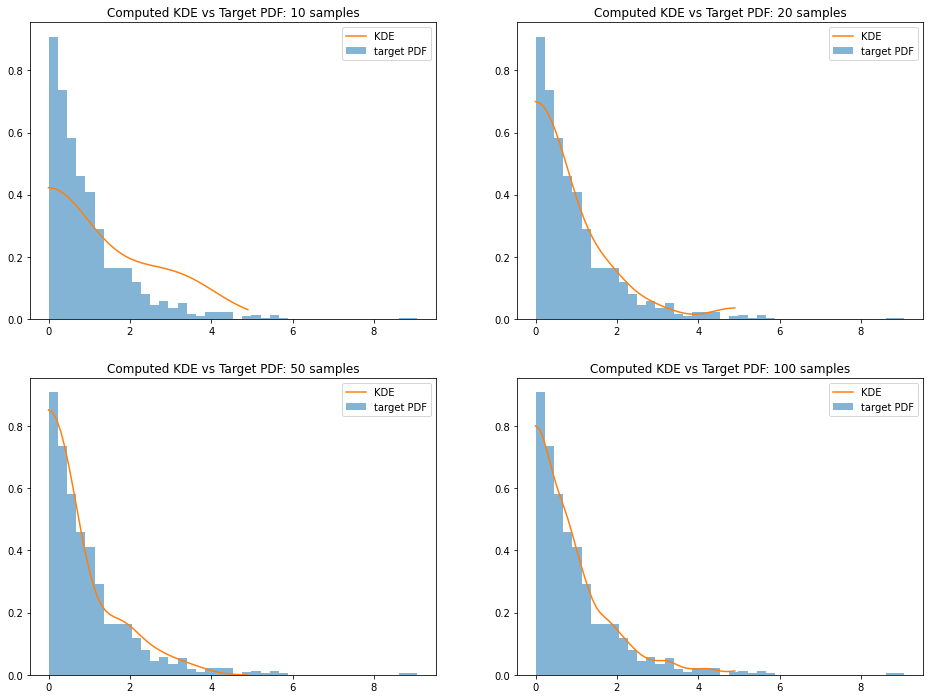

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,12))
axes = axes.reshape(-1)
plt.title('Modelling Distribution of Deer Sizes for Deer Hunts')

for i, (n, d) in enumerate(data_bw_opt.items()):
  y = [float(x) for x in d.split(" ")]
  axes[i].hist(y_emp, density=True, bins=40, alpha=0.55, label='target PDF')
  axes[i].plot(x, y, label=f'KDE')
  axes[i].set_title(f'Computed KDE vs Target PDF: {n} samples')
  axes[i].legend()
# axe.legend()

# plt.tight_layout()
# plt.savefig('kde_plots_exp.png')

sample mean: 4.82, expected value from KDE: 4.820049366942386, true mean: 5.0


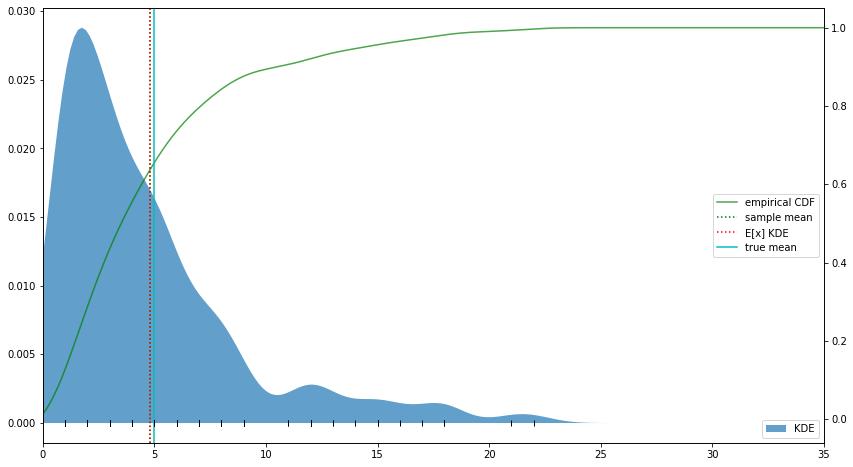

In [9]:
from sklearn.neighbors import KernelDensity

n_trials = 200
n_kde_trials = n_trials
p = 0.2
x_max = 35

gen_function = lambda p, n: np.random.geometric(p, size=n)

def get_estimates(n_trials, n_kde_trials, gen_function, p):
    disaster_freq_pmf = gen_function(p, n_trials)

    y = disaster_freq_pmf
    x = np.linspace(0, x_max, n_trials)

    # instantiate and fit the KDE model
    kde = KernelDensity(bandwidth=1, kernel='gaussian')
    kde.fit(y[:, None])

    # score_samples returns the log of the probability density
    x_kde = np.linspace(0, x_max, n_kde_trials)

    logprob = kde.score_samples(x_kde[:, None])
    y_kde = np.exp(logprob)
    y_kde /= np.sum(y_kde)

    expected_y_kde = np.sum([x_kde[i]*y_kde[i] for i in range(n_kde_trials)])
    sample_mean = np.mean(y)

    return {'sample': {'x': x, 'y': y, 'est': sample_mean}, 'kde': {'x': x_kde, 'y': y_kde, 'est':expected_y_kde}}

def get_errors(trial_range, gen_function, p, target):
    errors = {'sample': [], 'kde': [], 'n': []}
    for t in trial_range:
        errors['n'].append(t)
        estimates = get_estimates(t, t, gen_function, p)
        errors['sample'].append((estimates['sample']['est']-target)**2)
        errors['kde'].append((estimates['kde']['est']-target)**2)
    return errors

est = get_estimates(n_trials, n_kde_trials, gen_function, p)
sample = est['sample']
kde = est['kde']

plt.figure(figsize=(14,8))
plt.fill_between(kde['x'], kde['y'], alpha=0.7, label='KDE')
plt.legend(loc='lower right')

y_kde_cdf = np.cumsum(kde['y'])

ax2 = plt.gca().twinx()
ax2.plot(kde['x'], y_kde_cdf, alpha=0.7, color='g', label='empirical CDF')
# plt.fill_between(x, y_emp[:,0], alpha=0.8)

ax2.axvline(sample['est'], c='g', linestyle='dotted', label='sample mean')
ax2.axvline(kde['est'], c='r', linestyle='dotted', label='E[x] KDE')
ax2.axvline(1/p, c='c', label='true mean')

ax2.legend()

plt.plot(sample['y'], np.full_like(sample['x'], -0.01), '|k', markeredgewidth=1)
plt.xlim(0, x_max)

print(f"sample mean: {sample['est']}, expected value from KDE: {kde['est']}, true mean: {1/p}")

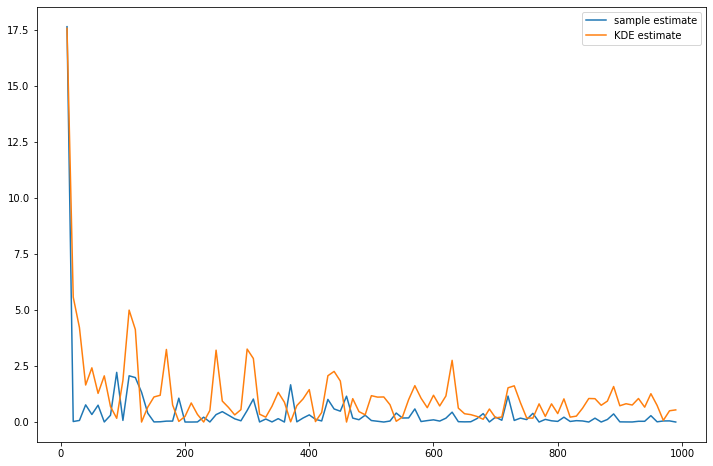

In [10]:
trial_range = np.arange(10, 1000, step=10)
p = 0.1
errors = get_errors(trial_range, gen_function, p, 1/p)

fig, ax0 = plt.subplots(1, figsize=(12,8))
ax0.plot(errors['n'], errors['sample'], label='sample estimate')
ax0.plot(errors['n'], errors['kde'], label='KDE estimate')
ax0.legend()

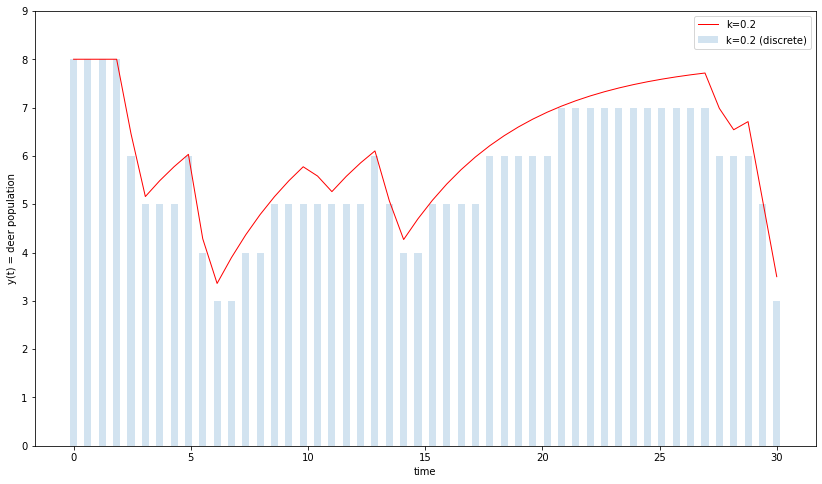

In [ ]:
from scipy.integrate import odeint

# see https://www.math.uci.edu/~ndonalds/math3d/popmodels.pdf for population models
# also: https://www2.gwu.edu/~mathgss/old_site/Slides/MikeC_Seminar.pdf

max_deer = 8

def f(y, t, k, c):
    dydt = k*(max_deer-y) - y*c[int(t)]
    return dydt

# initial condition
y0 = max_deer

# time points
t = np.linspace(0,30)

c = np.zeros(t.shape)
c[2] = 0.5
c[5] = 0.8
c[10] =  0.2
c[13] = 0.5
c[27] = 0.2
c[29] = 0.8

discretize = lambda y: [int(y_i) for y_i in y]

# solve ODEs
k1 = 0.2
y1 = odeint(f,y0,t,args=(k1,c))
k2 = 0.2
y2 = odeint(f,y0,t,args=(k2,c))

y1_d = discretize(y1)
y2_d = discretize(y2)

# plot results
plt.figure(figsize=(14,8))
plt.ylim((0, y0+1))
plt.plot(t,y1,'r-',linewidth=1,label=f'k={k1}')
plt.bar(t,y1_d, label=f'k={k1} (discrete)', width=0.3, alpha=0.2)

# plt.plot(t,y2,'b-',linewidth=1,label=f'k={k2}')
# plt.plot(t,y2_d,'b--',linewidth=1,label=f'k={k2} (discrete)')

plt.xlabel('time')
plt.ylabel('y(t) = deer population')
plt.legend()
plt.show()

12

### Dynamics between deer population and likelihood of catching a deer

We need to devise a mapping between the instantaneous deer population $P(t)$ and the binary probability of catching a deer $\theta$ (regardless of its size). Clearly, $P(t) \propto \theta$ - more deer leads to a larger chance of catching a deer. The task remains to mathematically characterise this relationship. 

Consider 
- $p \in [0, p_{max}]$ - deer population ratio: ratio of running population $P(t)$ to max deer per hunt. $p_{max} \in \mathbb{N}$ is the maximum ratio. For example, if max deer per hunt is 4 and carrying capacity is 12 (max population), then $p_{max} = \frac{12}{4} = 3$.  
- $\theta \in [0, \theta_{max}], \ \theta_{max} \leq 1\ $ - binary prob. of catching a deer
- $p_c$ - critical population ratio. Will usually equal 1 (the case where the current deer population = max number of deer per hunt). Below this, we are guaranteed to catch less deer than max number per hunt.
- $\theta_c$ - critical probability value. This is the proability of catching a deer when $p=p_c$

Now, we need to define a function $f = \theta(p)$ that maps $\theta$ to $p$ such that the probability of catching a deer is linked to the population. Consider

$f=\begin{cases} 
      f_1 = \theta_c p & p \in [0; p_c] \\
      f_2 = \alpha(p-p_c) + \theta_c & p \in [p_c; p_{max}]
\end{cases}$
where $\alpha = \frac{\theta_{max}\; - \; \theta_c}{p_{max} \; - \; p_c}$

This mapping function is plotted below.




In [ ]:
max_deer_per_hunt = 4
p_c = 1
p_max = 3
theta_c = 0.85
theta_max = 0.95

p = np.linspace(0, p_max, num=50)
f1 = lambda p: theta_c*p

alpha = (theta_max-theta_c)/((p_max-p_c))
f2 = lambda p: alpha*(p-p_c)+theta_c

f = np.piecewise(p, [p < p_c, p >= p_c], [f1, f2])

fig, ax0 = plt.subplots(1, figsize=(14,8))

ax0.plot(p, f, label=r'$\theta(p)$')
ax0.axhline(theta_c, color='r', label=r'$\theta_c$', linestyle="dotted")
ax0.axhline(theta_max, color='r', label=r'$\theta_{m}$', linestyle="dashed")
ax0.axhline(1, color='k', label=r'$\theta = 1$', linestyle="dotted")

ax0.axvline(p_c, color='g', label=r'$p_c$', linestyle='dotted')
ax0.axvline(p_max, color='g', label=r'$p_{m}$', linestyle='dashed')

ax0.set_xlabel('p - ratio of deer population to max deer per hunt')
ax0.set_ylabel(r'$\theta$' + ' - Bernoulli (binary) prob. of catching a deer')
ax0.legend()

plt.tight_layout()
# plt.savefig('deer_pop_prob.png')


NameError: ignored